#### Основная цель проекта
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# получаем данные из файла
data = pd.read_csv('stud_math.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
# переименуем столбцы для удобства
data.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason',
                'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
                'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                'health', 'absences', 'score']
data.head(10)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# процедура - заменить пропуски на None
def delete_pass(x):
    x = str(x)
    if x.strip() == '':
        return None
    else:
        return x

In [4]:
# рассмотрим каждый столбец

In [5]:
# school
print("Количество уникальных значений:", data.school.nunique())
print(data.school.value_counts())
# Рассматриваются две школы
data.loc[:, ['school']].info()

Количество уникальных значений: 2
GP    349
MS     46
Name: school, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [6]:
# sex
print("Количество уникальных значений:", data.sex.nunique())
print(data.sex.value_counts())
data.loc[:, ['sex']].info()

Количество уникальных значений: 2
F    208
M    187
Name: sex, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [7]:
# age
print("Количество уникальных значений:", data.age.nunique())
print(data.age.value_counts())
data.loc[:, ['age']].info()

Количество уникальных значений: 8
16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

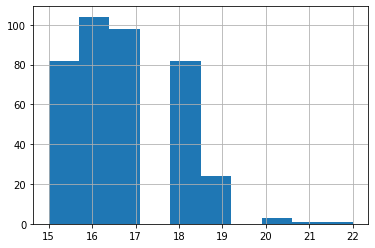

In [8]:
# Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение
data.age.hist()
data.age.describe()

In [9]:
# address
print("Количество уникальных значений:", data.address.nunique())
print(data.address.value_counts())
data.loc[:, ['address']].info()
# есть пропуски
# убираем пропуски (заменяем на None)
# можно так - data.address = data.address.apply(delete_pass)
# можно так - data.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
# но ниже сделаем для всех строковых столбцов

Количество уникальных значений: 2
U    295
R     83
Name: address, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [10]:
# обработаем все строковые колонки - убрать пропуски
columns_obj_list = data.select_dtypes(include=[np.dtype]).columns
for column in columns_obj_list:
    data[column] = data[column].apply(delete_pass)

In [11]:
data.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [12]:
# famsize
print("Количество уникальных значений:", data.famsize.nunique())
print(data.famsize.value_counts())
data.loc[:, ['famsize']].info()

Количество уникальных значений: 3
GT3    261
LE3    107
nan     27
Name: famsize, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [13]:
# pstatus
print("Количество уникальных значений:", data.pstatus.nunique())
print(data.pstatus.value_counts())
data.loc[:, ['pstatus']].info()

Количество уникальных значений: 3
T      314
nan     45
A       36
Name: pstatus, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [14]:
# medu
print("Количество уникальных значений:", data.medu.nunique())
print(data.medu.value_counts())
data.loc[:, ['medu']].info()

Количество уникальных значений: 5
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [15]:
# есть пропуски
# узнаем среднее значение и округлим
mean = round(data.medu.mean())
# заменим пропуски на среднее
data.medu = data.medu.apply(lambda x: mean if np.isnan(x) else x)
print(data.loc[:, ['medu']].info())
print(data.medu.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: medu, dtype: int64


count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

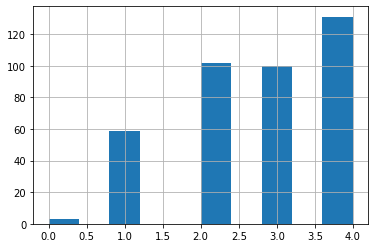

In [16]:
data.medu.hist()
data.medu.describe()

In [17]:
# fedu
print("Количество уникальных значений:", data.fedu.nunique())
print(data.fedu.value_counts())
data.loc[:, ['fedu']].info()

Количество уникальных значений: 6
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [18]:
# значения могут быть только от 0 до 4, видим, что есть другое
# предположим, что это опечатка,заменим на 4, остальные пропуски заменим на среднее
data.fedu = data.fedu.apply(lambda x: 4 if x > 4 else x)

Количество уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None


count    395.000000
mean       2.546835
std        1.061418
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

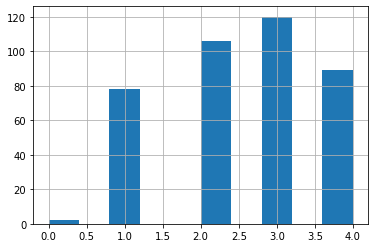

In [19]:
# узнаем среднее значение и округлим
mean = round(data.fedu.mean())
# заменим пропуски на среднее
data.fedu = data.fedu.apply(lambda x: mean if np.isnan(x) else x)
print("Количество уникальных значений:", data.fedu.nunique())
print(data.loc[:, ['fedu']].info())
data.fedu.hist()
data.fedu.describe()

In [20]:
# mjob
print("Количество уникальных значений:", data.mjob.nunique())
print(data.mjob.value_counts())
data.loc[:, ['mjob']].info()

Количество уникальных значений: 6
other       133
services     98
at_home      58
teacher      55
health       32
nan          19
Name: mjob, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [21]:
# fjob
print("Количество уникальных значений:", data.fjob.nunique())
print(data.fjob.value_counts())
data.loc[:, ['fjob']].info()

Количество уникальных значений: 6
other       197
services    102
nan          36
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [22]:
# reason
print("Количество уникальных значений:", data.reason.nunique())
print(data.reason.value_counts())
data.loc[:, ['reason']].info()

Количество уникальных значений: 5
course        137
home          104
reputation    103
other          34
nan            17
Name: reason, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [23]:
# guardian
print("Количество уникальных значений:", data.guardian.nunique())
print(data.guardian.value_counts())
data.loc[:, ['guardian']].info()

Количество уникальных значений: 4
mother    250
father     86
nan        31
other      28
Name: guardian, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [24]:
# traveltime
print("Количество уникальных значений:", data.traveltime.nunique())
print(data.traveltime.value_counts())
data.loc[:, ['traveltime']].info()

Количество уникальных значений: 4
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [25]:
# узнаем среднее значение и округлим
mean = round(data.traveltime.mean())
# заменим пропуски на среднее
data.traveltime = data.traveltime.apply(lambda x: mean if np.isnan(x) else x)
print(data.traveltime.value_counts())
data.loc[:, ['traveltime']].info()

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [26]:
# studytime
print("Количество уникальных значений:", data.studytime.nunique())
print(data.studytime.value_counts())
data.loc[:, ['studytime']].info()

Количество уникальных значений: 4
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [27]:
# узнаем среднее значение и округлим
mean = round(data.studytime.mean())
# заменим пропуски на среднее
data.studytime = data.studytime.apply(lambda x: mean if np.isnan(x) else x)
print(data.studytime.value_counts())
data.loc[:, ['studytime']].info()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [28]:
# failures
print("Количество уникальных значений:", data.failures.nunique())
print(data.failures.value_counts())
data.loc[:, ['failures']].info()

Количество уникальных значений: 4
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [29]:
# узнаем среднее значение и округлим
mean = round(data.failures.mean())
# заменим пропуски на среднее
data.failures = data.failures.apply(lambda x: mean if np.isnan(x) else x)
print(data.failures.value_counts())
data.loc[:, ['failures']].info()

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [30]:
# schoolsup
print("Количество уникальных значений:", data.schoolsup.nunique())
print(data.schoolsup.value_counts())
data.loc[:, ['schoolsup']].info()

Количество уникальных значений: 3
no     335
yes     51
nan      9
Name: schoolsup, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [31]:
# famsup
print("Количество уникальных значений:", data.famsup.nunique())
print(data.famsup.value_counts())
data.loc[:, ['famsup']].info()

Количество уникальных значений: 3
yes    219
no     137
nan     39
Name: famsup, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [32]:
# paid
print("Количество уникальных значений:", data.paid.nunique())
print(data.paid.value_counts())
data.loc[:, ['famsup']].info()

Количество уникальных значений: 3
no     200
yes    155
nan     40
Name: paid, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [33]:
# activities
print("Количество уникальных значений:", data.activities.nunique())
print(data.activities.value_counts())
data.loc[:, ['activities']].info()

Количество уникальных значений: 3
yes    195
no     186
nan     14
Name: activities, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [34]:
# nursery
print("Количество уникальных значений:", data.nursery.nunique())
print(data.nursery.value_counts())
data.loc[:, ['nursery']].info()

Количество уникальных значений: 3
yes    300
no      79
nan     16
Name: nursery, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [35]:
# higher
print("Количество уникальных значений:", data.higher.nunique())
print(data.higher.value_counts())
data.loc[:, ['higher']].info()

Количество уникальных значений: 3
yes    356
nan     20
no      19
Name: higher, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [36]:
# internet
print("Количество уникальных значений:", data.internet.nunique())
print(data.internet.value_counts())
data.loc[:, ['internet']].info()

Количество уникальных значений: 3
yes    305
no      56
nan     34
Name: internet, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [37]:
# romantic
print("Количество уникальных значений:", data.romantic.nunique())
print(data.romantic.value_counts())
data.loc[:, ['romantic']].info()

Количество уникальных значений: 3
no     240
yes    124
nan     31
Name: romantic, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [38]:
# famrel
print("Количество уникальных значений:", data.famrel.nunique())
print(data.famrel.value_counts())
# значения должны быть от 1 до 5, видим, что есть значение -1, можно удалить
# или заменим на 1
data.famrel = data.famrel.apply(lambda x: 1 if x == -1 else x)
print("Количество уникальных значений:", data.famrel.nunique())
print(data.famrel.value_counts())
data.loc[:, ['famrel']].info()

Количество уникальных значений: 6
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
Количество уникальных значений: 5
4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [39]:
# узнаем среднее значение и округлим
mean = round(data.famrel.mean())
# заменим пропуски на среднее
data.famrel = data.famrel.apply(lambda x: mean if np.isnan(x) else x)
print(data.famrel.value_counts())
data.loc[:, ['famrel']].info()

4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [40]:
# freetime
print("Количество уникальных значений:", data.freetime.nunique())
print(data.freetime.value_counts())
data.loc[:, ['freetime']].info()

Количество уникальных значений: 5
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [41]:
# узнаем среднее значение и округлим
mean = round(data.freetime.mean())
# заменим пропуски на среднее
data.freetime = data.freetime.apply(lambda x: mean if np.isnan(x) else x)
print(data.freetime.value_counts())
data.loc[:, ['freetime']].info()

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [42]:
# studytime_granular, в описании нет этой колонки
print("Количество уникальных значений:", data.studytime_granular.nunique())
print(data.studytime_granular.value_counts())
data.loc[:, ['studytime_granular']].info()

Количество уникальных значений: 4
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [43]:
# не знаем, что это за числа, заменим пропуски на часто встречающееся, это -6
data.studytime_granular = data.studytime_granular.apply(
    lambda x: -6 if np.isnan(x) else x)
print(data.studytime_granular.value_counts())
data.loc[:, ['studytime_granular']].info()

-6.0     201
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [44]:
# goout
print("Количество уникальных значений:", data.goout.nunique())
print(data.goout.value_counts())
data.loc[:, ['goout']].info()

Количество уникальных значений: 5
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [45]:
# узнаем среднее значение и округлим
mean = round(data.goout.mean())
# заменим пропуски на среднее
data.goout = data.goout.apply(lambda x: mean if np.isnan(x) else x)
print(data.goout.value_counts())
data.loc[:, ['goout']].info()

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [46]:
# health
print("Количество уникальных значений:", data.health.nunique())
print(data.health.value_counts())
data.loc[:, ['health']].info()

Количество уникальных значений: 5
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [47]:
# absences
print("Количество уникальных значений:", data.absences.nunique())
print(data.absences.value_counts())
data.loc[:, ['absences']].info()

Количество уникальных значений: 36
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [48]:
# заменим пропуски на 0, будто не было пропусков занятий
data.absences = data.absences.apply(lambda x: 0 if np.isnan(x) else x)
data.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [49]:
# score
print("Количество уникальных значений:", data.score.nunique())
print(data.score.value_counts())
data.loc[:, ['score']].info()

Количество уникальных значений: 18
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [50]:
# узнаем среднее значение и округлим
mean = round(data.score.mean())
# заменим пропуски на среднее
data.score = data.score.apply(lambda x: mean if np.isnan(x) else x)
print(data.score.value_counts())
data.loc[:, ['score']].info()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
52.0      6
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [51]:
# Выясним, какие столбцы коррелируют с баллами по госэкзамену.
data.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.161869,0.084755,-0.015355,0.228081,0.015355,0.065250,0.026443,0.134069,-0.065946,0.090515,-0.153481
medu,-0.161375,1.000000,0.606656,-0.160877,0.077050,-0.245110,-0.077050,-0.013853,0.026210,0.063361,-0.045463,-0.009754,0.207583
fedu,-0.161869,0.606656,1.000000,-0.141115,0.016611,-0.259788,-0.016611,-0.026083,-0.016259,0.042385,0.030726,0.017405,0.123559
traveltime,0.084755,-0.160877,-0.141115,1.000000,-0.094637,0.049670,0.094637,-0.019040,-0.012496,0.051775,-0.046027,-0.036597,-0.056016
studytime,-0.015355,0.077050,0.016611,-0.094637,1.000000,-0.166598,-1.000000,0.037638,-0.119014,-0.051090,-0.079415,-0.024824,0.114074
failures,0.228081,-0.245110,-0.259788,0.049670,-0.166598,1.000000,0.166598,-0.017230,0.094826,0.113649,0.078668,0.053869,-0.328451
studytime_granular,0.015355,-0.077050,-0.016611,0.094637,-1.000000,0.166598,1.000000,-0.037638,0.119014,0.051090,0.079415,0.024824,-0.114074
famrel,0.065250,-0.013853,-0.026083,-0.019040,0.037638,-0.017230,-0.037638,1.000000,0.165324,0.074217,0.084233,-0.078678,0.052626
freetime,0.026443,0.026210,-0.016259,-0.012496,-0.119014,0.094826,0.119014,0.165324,1.000000,0.292305,0.059810,0.006355,0.017298
goout,0.134069,0.063361,0.042385,0.051775,-0.051090,0.113649,0.051090,0.074217,0.292305,1.000000,-0.015029,-0.052370,-0.127048


In [52]:
# score не коррелирует с age, traveltime, failures, studytime_granular, goout, health
# score наиболее сильно корреллирует с medu, fedu, studytime
# Возмножно на оценку на госэкзамене влияет образование родителей, а также время на учёбу помимо школы в неделю
# Есть вероятность, что те студенты, у которых родители с плохим образованием 
# и которые не тратят время на учебу помимо школы, попадут в группу риска

In [53]:
# для номинативных переменных можно посмотреть,
# различаются ли распределения рейтинга в зависимости от значения этих переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(data.loc[:, column])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

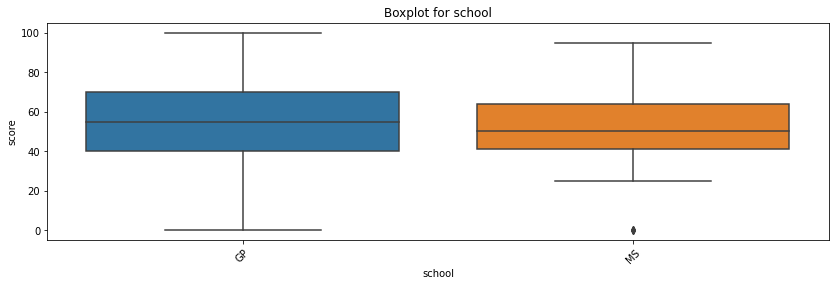

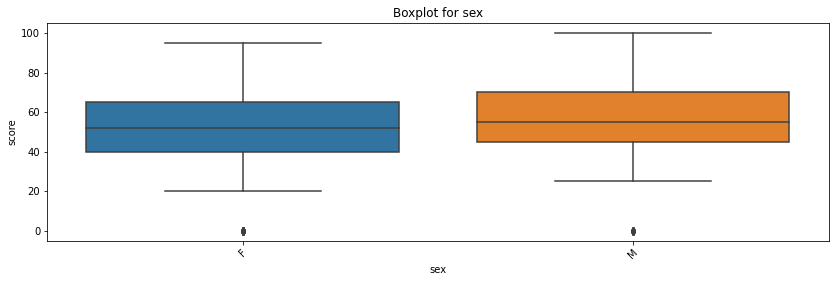

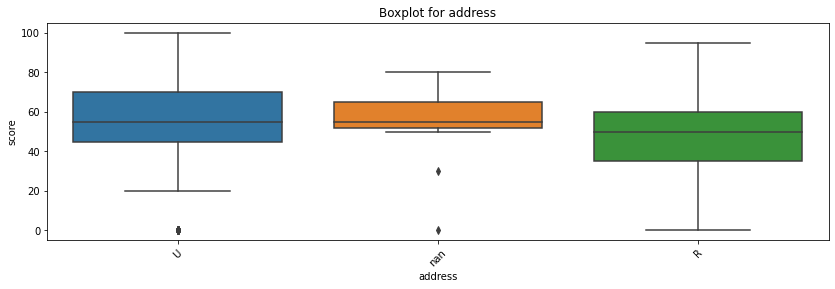

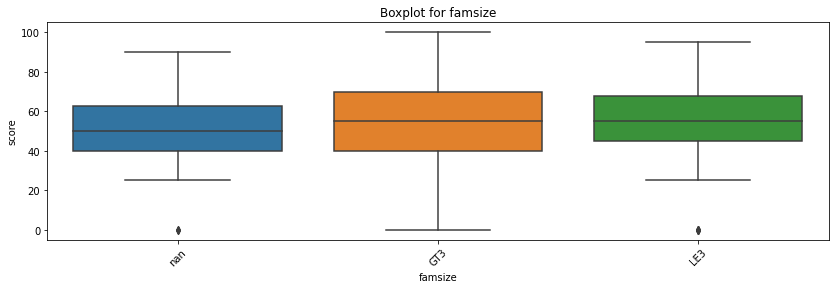

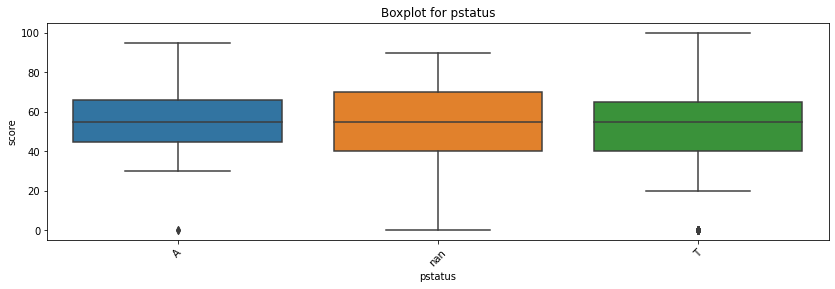

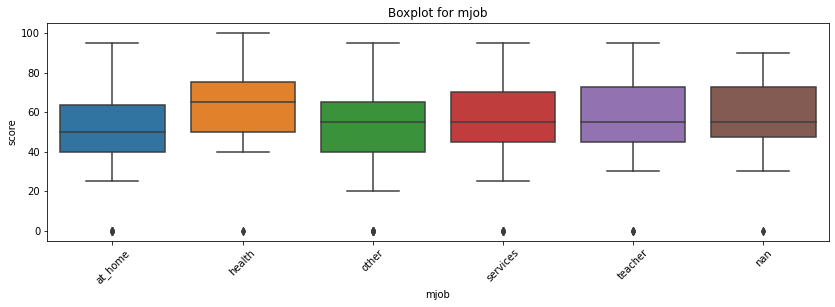

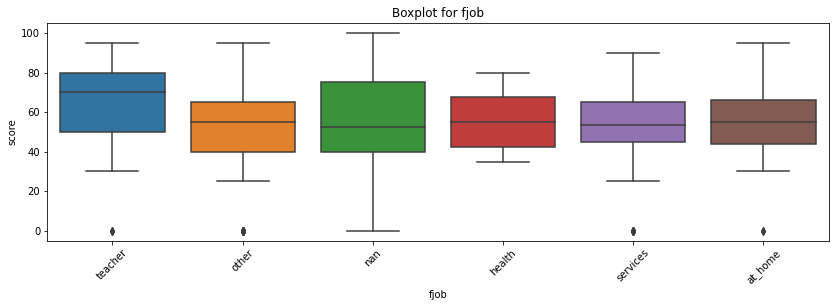

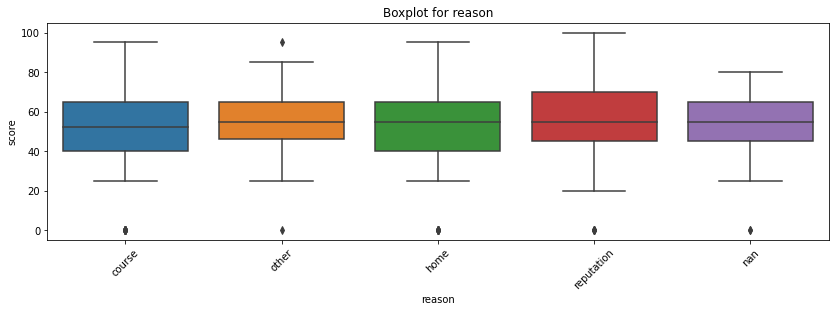

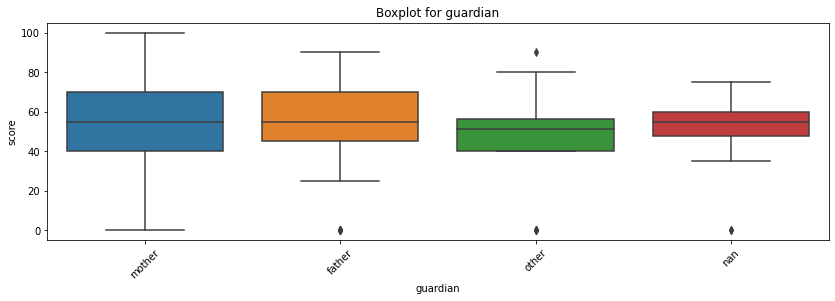

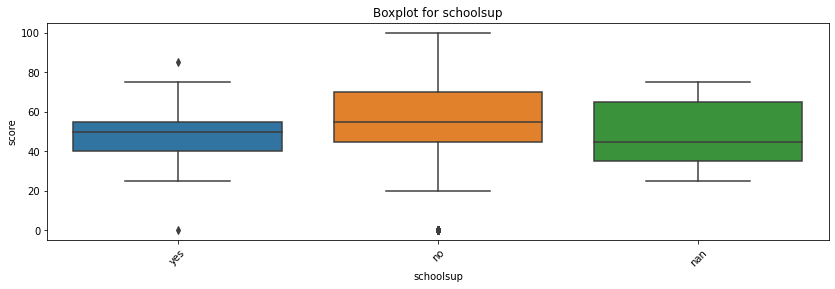

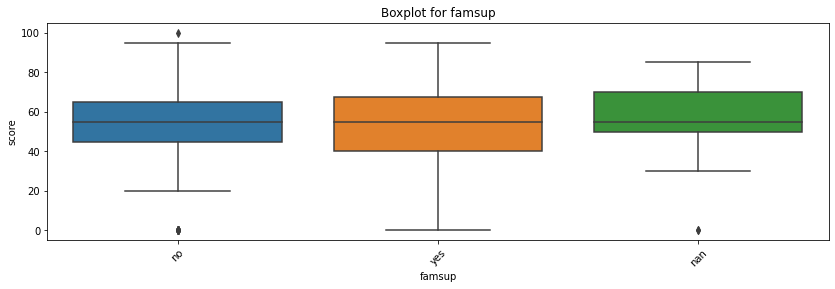

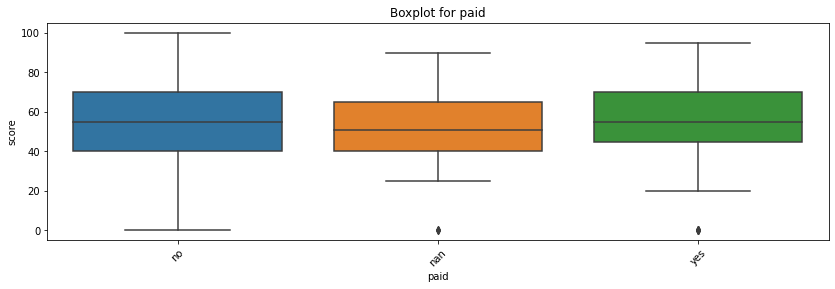

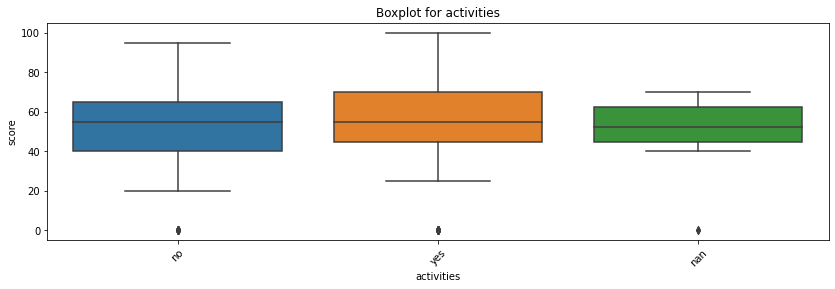

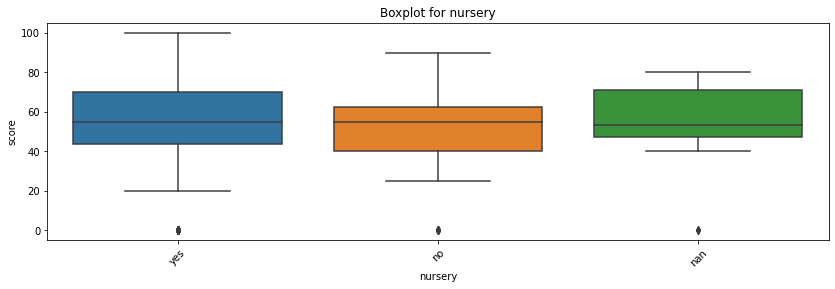

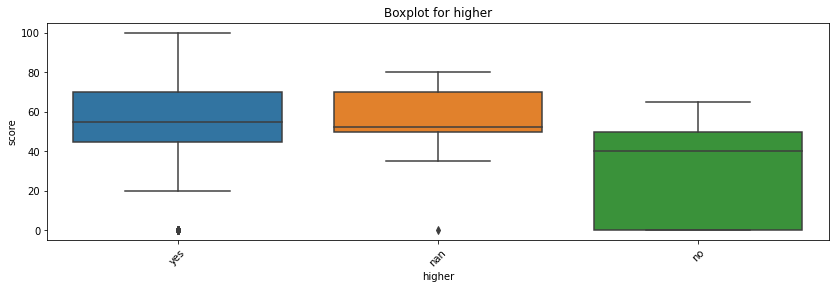

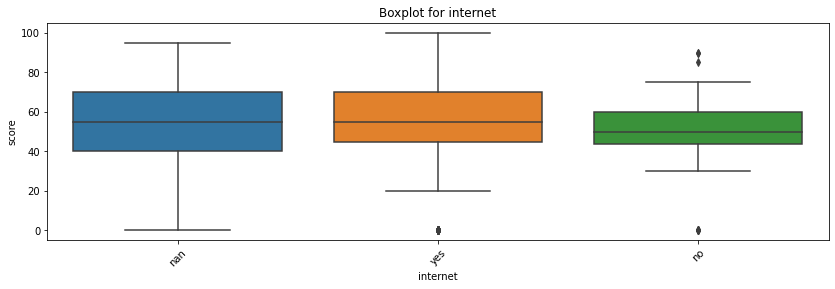

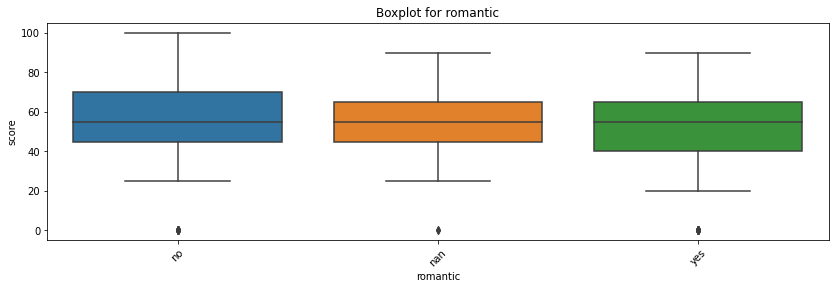

In [54]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [55]:
# Проверим, есть ли статистическая разница по номинативным признакам, с помощью теста Стьюдента
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
        else:
            print('Не найдены различия для колонки', column)
            break

In [56]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Не найдены различия для колонки school
Не найдены различия для колонки sex
Не найдены различия для колонки address
Не найдены различия для колонки famsize
Не найдены различия для колонки pstatus
Не найдены различия для колонки mjob
Не найдены различия для колонки fjob
Не найдены различия для колонки reason
Не найдены различия для колонки guardian
Не найдены различия для колонки schoolsup
Не найдены различия для колонки famsup
Не найдены различия для колонки paid
Не найдены различия для колонки activities
Не найдены различия для колонки nursery
Не найдены различия для колонки higher
Не найдены различия для колонки internet
Не найдены различия для колонки romantic


In [57]:
# Важные переменные, которые, возможно, оказывают влияние на оценку, это - medu, fedu, studytime

#### В результате EDA для анализа влияния условий жизни на результаты госэкзамена по математике были получены следующие выводы:

- В данных много пустых значений. Данные в большинстве случаев заполнены по среднему значению.
- score наиболее сильно корреллирует с medu, fedu, studytime. Возмножно на оценку на госэкзамене влияет образование родителей, а также время на учёбу помимо школы в неделю. Есть вероятность, что те студенты, у которых родители с плохим образованием и которые не тратят время на учебу помимо школы, попадут в группу риска.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это medu, fedu, studytime.